# Machine Learning
#### Attribution to Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow by Aurélien Géron (O'Reilly Media, Inc., 2019)

In [1]:
import pandas as pd

housing = pd.read_csv('data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

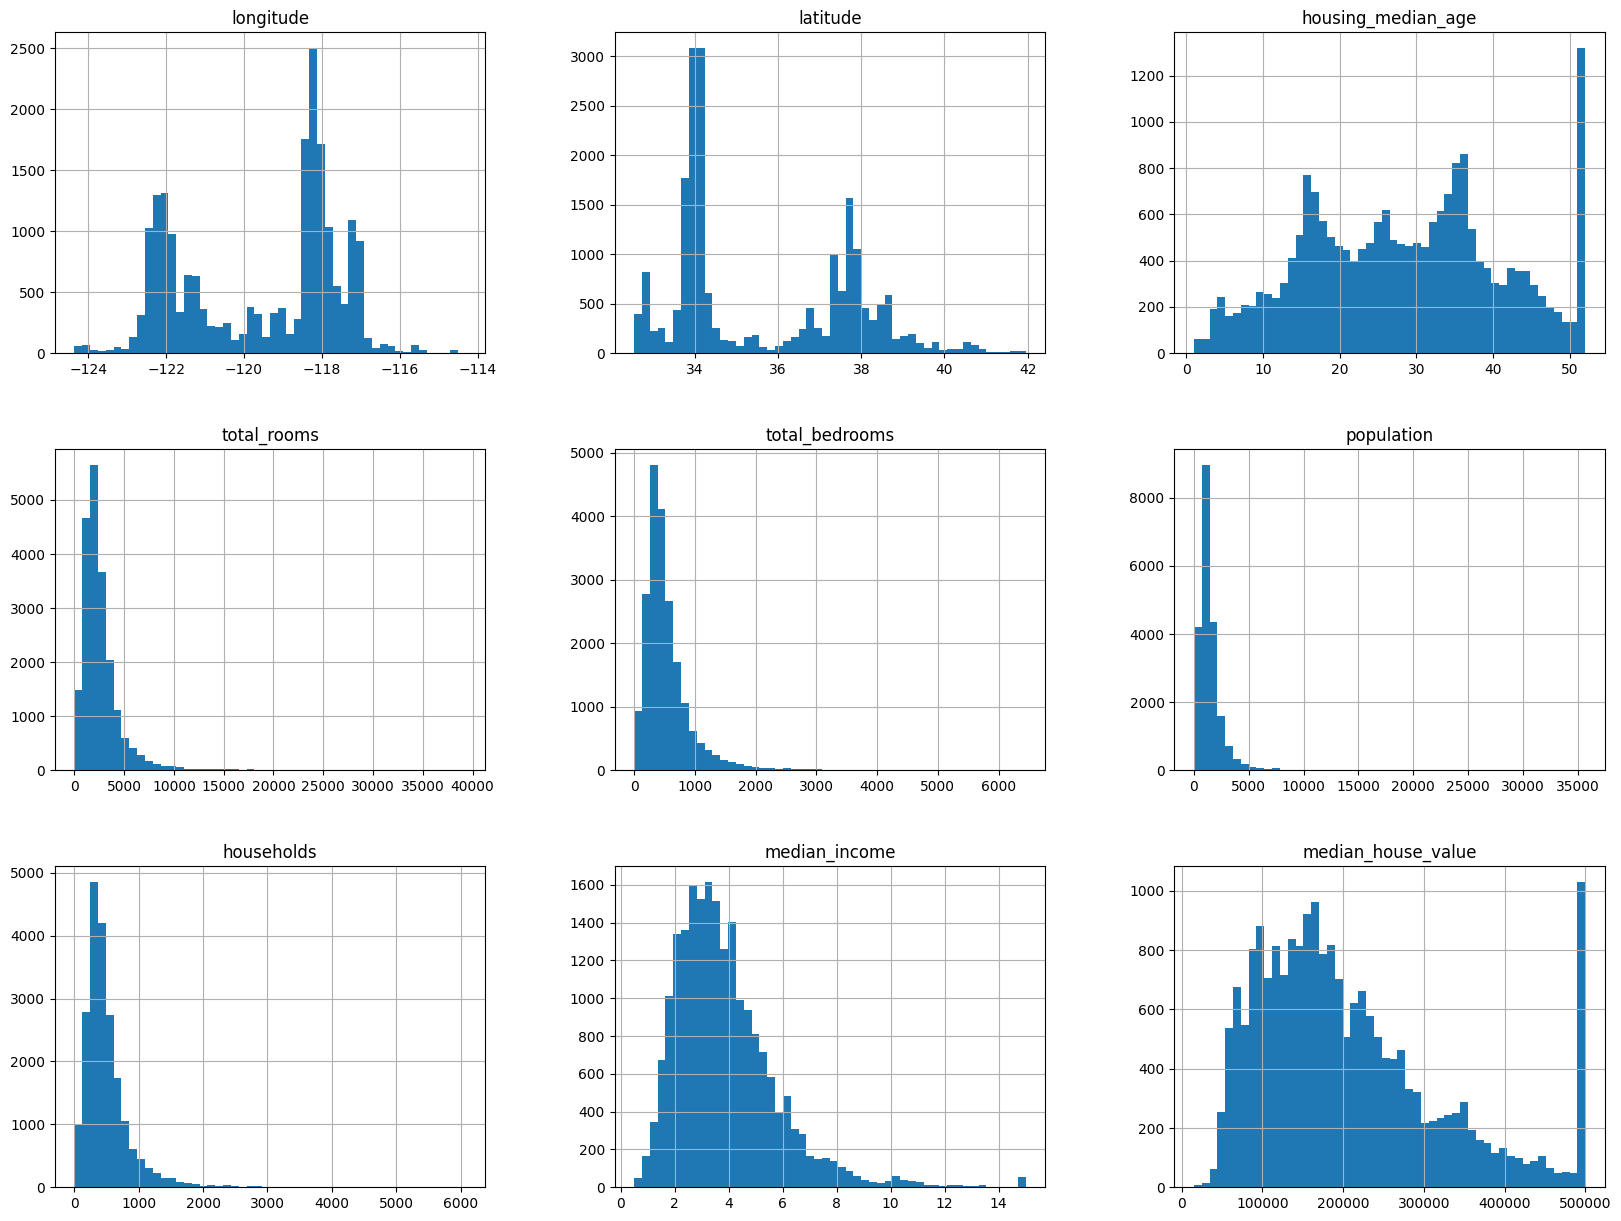

In [4]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

## Splitting the dataset

In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size= 0.2, random_state=45)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13240,-117.67,34.12,15.0,3162.0,495.0,1145.0,473.0,5.3525,191700.0,INLAND
12586,-121.50,38.53,37.0,3642.0,684.0,1508.0,657.0,3.5231,114300.0,INLAND
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,144600.0,INLAND
15456,-117.28,33.18,16.0,3002.0,591.0,842.0,538.0,2.1205,157300.0,NEAR OCEAN
19798,-123.12,40.54,23.0,1091.0,217.0,539.0,201.0,1.8696,61500.0,INLAND


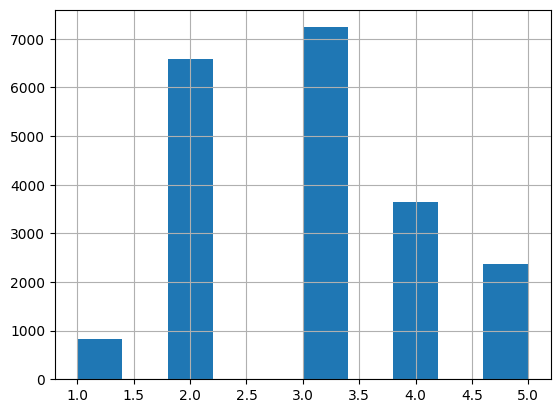

In [6]:
import numpy as np

housing['income_cat'] = pd.cut(
  housing['median_income'],
  bins=[0., 1.5, 3, 4.5, 6, np.inf],
  labels=[1,2,3,4,5]
)

housing['income_cat'].hist()
plt.show()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=56)

for train_index, test_index in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]



In [8]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [9]:
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

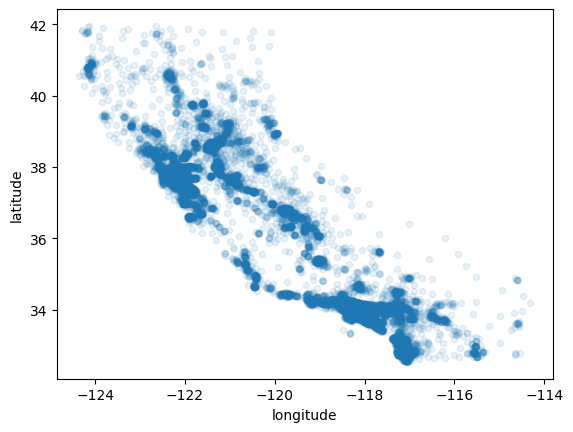

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

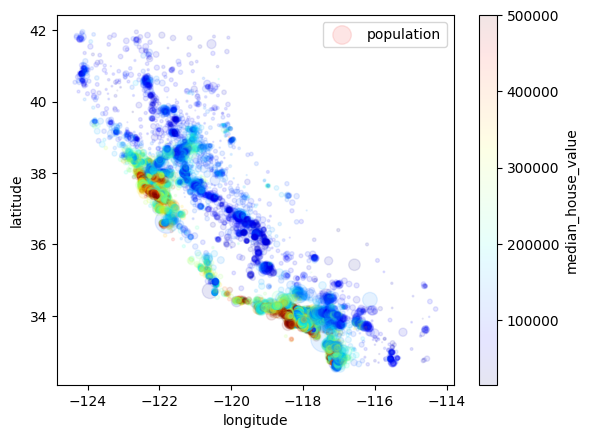

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, 
  s=housing["population"]/100, label="population",
  c="median_house_value", cmap="jet", colorbar=True
)

In [12]:
housing_corr = housing.corr()

/var/folders/k9/6xth_22x29gbgg2g0_q5sfv40000gq/T/ipykernel_16909/1236381092.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_corr = housing.corr()


In [13]:
housing_corr['median_house_value'].sort_values(ascending=True)

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

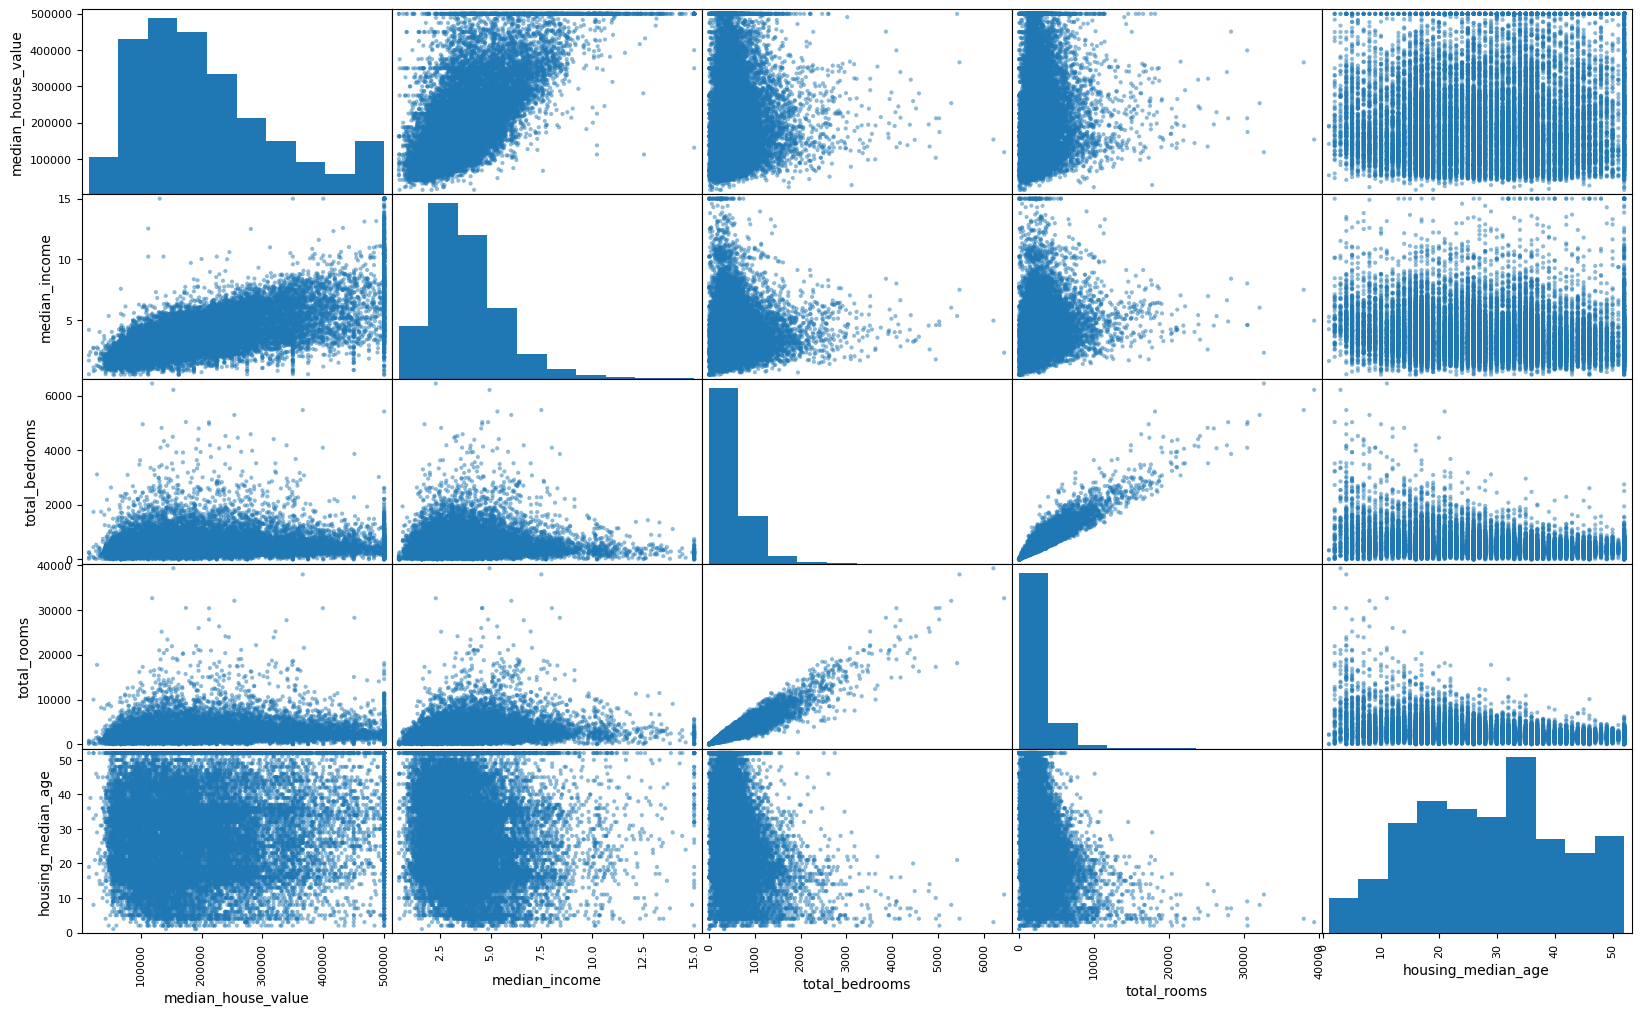

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(housing[['median_house_value', 'median_income', 'total_bedrooms', 'total_rooms', 'housing_median_age']], figsize=(20,12))
plt.show()

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

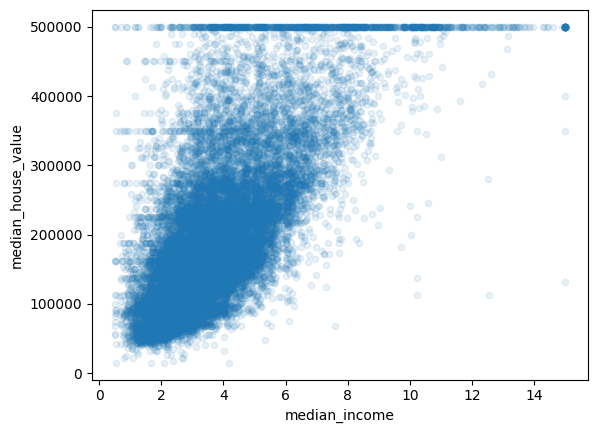

In [15]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [16]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_rooms'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [17]:
housing_corr = housing.corr()
housing_corr['median_house_value'].sort_values(ascending=False)

/var/folders/k9/6xth_22x29gbgg2g0_q5sfv40000gq/T/ipykernel_16909/790235710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_corr = housing.corr()


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

## Process

In [18]:
housing_X = strat_train_set.drop('median_house_value', axis=1)
housing_y = strat_train_set['median_house_value'].copy()

In [19]:
housing_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 160 to 15556
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [20]:
# # option 1
# housing_X.dropna(subset=['total_bedrooms'])
# #option 2
# housing_X.drop('total_bedrooms', axis=1)
# # option3 
# total_bedrooms_median = housing_X['total_bedrooms'].median()
# housing_X['total_bedrooms'].fillna(median, inplace=True)

In [21]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

housing_X_num = housing_X.drop('ocean_proximity', axis=1)

X = imputer.fit_transform(housing_X_num)

In [22]:
housing_X_num_tr = pd.DataFrame(X, columns=housing_X_num.columns, index=housing_X_num.index)

In [23]:
housing_X_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
160,-122.24,37.80,52.0,888.0,168.0,360.0,175.0,2.1944
10154,-117.90,33.88,28.0,2696.0,346.0,947.0,356.0,9.0055
17105,-122.22,37.46,13.0,2888.0,546.0,1182.0,504.0,6.0255
17235,-119.67,34.47,35.0,2700.0,422.0,1995.0,383.0,4.9757
13971,-116.85,34.25,5.0,5806.0,1030.0,569.0,219.0,4.0132


## Handling Categorical Data

In [24]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [25]:
housing_X_cat = housing_X[['ocean_proximity']]

In [26]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_X_cat_encoded = ordinal_encoder.fit_transform(housing_X_cat)

In [27]:
housing_X_cat_encoded[:10]

array([[3.],
       [0.],
       [4.],
       [0.],
       [1.],
       [1.],
       [0.],
       [3.],
       [0.],
       [3.]])

In [28]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [29]:
from sklearn.preprocessing import OneHotEncoder

oneHot_encoder = OneHotEncoder()
housing_X_cat_hot = oneHot_encoder.fit_transform(housing_X_cat)

housing_X_cat_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [30]:
housing_X_cat_hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [31]:
oneHot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Pipelines

In [32]:
# from sklearn.pipeline import Pipeline

# num_pipeline = Pipeline([
#   ('imputer', SimpleImputer(strategy='median'))
# ])

# cat_pipeline = Pipeline([
#   ('one-hot-encode', OneHotEncoder())
# ])

# housing_X_num_tr = num_pipeline.fit_transform(housing_X_num)
# housing_X_cat_tr = cat_pipeline.fit_transform(housing_X_cat)

In [33]:
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer

# num_features = housing_X_num.columns
# num_pipeline = Pipeline([
#   ('imputer', SimpleImputer(strategy='median'))
# ])

# cat_features = ['ocean_proximity']
# cat_pipeline = Pipeline([
#   ('one-hot-encode', OneHotEncoder())
# ])


# full_pipeline = ColumnTransformer([
#   ('num', num_pipeline, num_features),
#   ('cat', cat_pipeline, cat_features)
# ])

# clean_housing = full_pipeline.fit_transform(housing_X)
# clean_housing[:10]

# Custom Transformations

In [34]:
housing_X_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
160,-122.24,37.80,52.0,888.0,168.0,360.0,175.0,2.1944
10154,-117.90,33.88,28.0,2696.0,346.0,947.0,356.0,9.0055
17105,-122.22,37.46,13.0,2888.0,546.0,1182.0,504.0,6.0255
17235,-119.67,34.47,35.0,2700.0,422.0,1995.0,383.0,4.9757
13971,-116.85,34.25,5.0,5806.0,1030.0,569.0,219.0,4.0132


In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx = 3
bedrooms_idx = 4
population_idx = 5
household_idx = 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(
    self, 
    add_rooms_per_household = True,
    add_population_per_household=True,
    add_bedrooms_per_rooms=True
  ):
    self.add_rooms_per_household = add_rooms_per_household
    self.add_population_per_household = add_population_per_household
    self.add_bedrooms_per_rooms = add_bedrooms_per_rooms
  
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    retVal = np.c_[X]
    if self.add_rooms_per_household: 
      rooms_per_household = X[:, rooms_idx] / X[:, household_idx]
      retVal = np.c_[retVal, rooms_per_household]
    if self.add_population_per_household:
      population_per_household = X[:, population_idx] / X[:, household_idx]
      retVal = np.c_[retVal, population_per_household]
    if self.add_bedrooms_per_rooms:
      bedrooms_per_rooms = X[:, bedrooms_idx] / X[:, rooms_idx]
      retVal = np.c_[retVal, bedrooms_per_rooms]

    return retVal

attr_adder = CombinedAttributesAdder(add_population_per_household=False)
data_with_extras = attr_adder.transform(housing_X_num.values)

In [36]:
data_with_extras

array([[-122.24      ,   37.8       ,   52.        , ...,    2.1944    ,
           5.07428571,    0.18918919],
       [-117.9       ,   33.88      ,   28.        , ...,    9.0055    ,
           7.57303371,    0.12833828],
       [-122.22      ,   37.46      ,   13.        , ...,    6.0255    ,
           5.73015873,    0.18905817],
       ...,
       [-122.08      ,   37.63      ,   33.        , ...,    4.25      ,
           4.63758389,    0.18379161],
       [-118.04      ,   33.95      ,   35.        , ...,    5.2162    ,
           5.4178273 ,    0.18354756],
       [-117.07      ,   33.12      ,   21.        , ...,    3.1458    ,
           5.08666667,    0.20249017]])

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

num_features = list(housing_X_num)
num_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy='median')),
  ('adding_attribures', CombinedAttributesAdder()),
  # ('scaling', MinMaxScaler()),
  ('standard', StandardScaler())
])

cat_features = ['ocean_proximity']
cat_pipeline = Pipeline([
  ('one-hot-encode', OneHotEncoder())
])


full_pipeline = ColumnTransformer([
  ('num', num_pipeline, num_features),
  ('cat', cat_pipeline, cat_features)
])

housing_X_num_tr = num_pipeline.fit_transform(housing_X_num)


clean_housing = full_pipeline.fit_transform(housing_X)
clean_housing[:10]

array([[-1.33086711,  1.01402469,  1.85839644, -0.79922579, -0.87733771,
        -0.95558852, -0.84687745, -0.88082634, -0.13857576, -0.09023962,
        -0.37402677,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.83422125, -0.81877464, -0.04951673,  0.02647465, -0.45385329,
        -0.42927694, -0.37497605,  2.6967219 ,  0.83132589, -0.03825821,
        -1.30303063,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.32088974,  0.8550574 , -1.24196247,  0.11415966,  0.0219719 ,
        -0.21857299,  0.01088808,  1.13146904,  0.11600466, -0.06540321,
        -0.376027  ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-0.04877561, -0.54291964,  0.50695794,  0.02830142, -0.27303972,
         0.51037303, -0.30458192,  0.58005882,  0.62815569,  0.18146833,
        -0.87619879,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.35803295, -0.64578083, -1

In [38]:
clean_housing.shape

(16512, 16)

In [39]:
housing_y.shape

(16512,)

# Analyze

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(clean_housing, housing_y)

LinearRegression()

In [41]:
some_data = housing_X.iloc[:5]
some_label = housing_y.iloc[:5]
display(some_data.shape)
display(some_label.shape)

print(some_data)
some_data_prepared = full_pipeline.transform(housing_X)
display(some_data_prepared.shape)

predictions = lin_reg.predict(some_data_prepared)
print(predictions)
print(some_label)

(5, 9)

(5,)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
160      -122.24     37.80                52.0        888.0           168.0   
10154    -117.90     33.88                28.0       2696.0           346.0   
17105    -122.22     37.46                13.0       2888.0           546.0   
17235    -119.67     34.47                35.0       2700.0           422.0   
13971    -116.85     34.25                 5.0       5806.0          1030.0   

       population  households  median_income ocean_proximity  
160         360.0       175.0         2.1944        NEAR BAY  
10154       947.0       356.0         9.0055       <1H OCEAN  
17105      1182.0       504.0         6.0255      NEAR OCEAN  
17235      1995.0       383.0         4.9757       <1H OCEAN  
13971       569.0       219.0         4.0132          INLAND  


(16512, 16)

[184143.34098166 412140.48781548 323761.63228415 ... 236248.11829204
 263493.02927188 170775.64291796]
160      211500.0
10154    375400.0
17105    409300.0
17235    500001.0
13971    163100.0
Name: median_house_value, dtype: float64


In [42]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(clean_housing)
lin_mse = mean_squared_error(housing_y, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68005.44379575887

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = Pipeline([
  ('poly', PolynomialFeatures(degree=3)),
  ('lin', LinearRegression())
])
poly_reg.fit(clean_housing, housing_y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('lin', LinearRegression())])

In [44]:
predictions = poly_reg.predict(clean_housing)
poly_mse = mean_squared_error(housing_y, predictions)
poly_rmse = np.sqrt(poly_mse)
poly_rmse

51602.07039986208

In [45]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(clean_housing, housing_y)

DecisionTreeRegressor()

In [46]:
predictions = tree_reg.predict(clean_housing)
tree_mse = mean_squared_error(housing_y, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, clean_housing, housing_y, cv=10, scoring="neg_mean_squared_error")
tree_rmse_scores = np.sqrt(-scores)

In [48]:
tree_rmse_scores.mean()

70981.96772923454

In [49]:
tree_rmse_scores.std()

2856.799612856506

In [50]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_clean = full_pipeline.transform(X_test)

predictions_poly = poly_reg.predict(X_test_clean)
poly_mse = mean_squared_error(y_test, predictions_poly)
poly_rmse = np.sqrt(poly_mse)
poly_rmse

621805.745987128